## Background / Motivation

As avid travelers who are enthusiastic about finding decent accommodations, we all have experience with using Airbnb. In recent years, people have been looking for options other than traditional hotels and beds and breakfasts, and Airbnb’s popularity has surged during a digital age with technology. Therefore, we want to explore and analyze the trends that appear within Airbnb’s datasets within Chicago, IL, as it is somewhere close to all of us at Northwestern. Through this analysis, we hope to understand the perspectives of and provide recommendations to Airbnb hosts and Airbnb customers in the city of Chicago.

## Problem statement 

1. What is the correlation between the Proximity from the City and the Price of the listing?
2. Are there associations between Amenities and the Price of the listing?
3. Are there associations between Host Attributes and Booking Satisfaction
4. How are Seasonal trends related to Pricing?

## Data sources

Chicago Airbnb Data: http://insideairbnb.com/get-the-data/

**Listings:** Summary information and metrics for listings in Chicago, collected on 9/12/2023.

**Calendar:** Quarterly data for the last 12 months, showing each date and status (availability, price) of a subset of listings on that date.

## Stakeholders

### Primary Stakeholders

**Hosts** are interested in pricing strategies, property types, and amenities to optimize their listings for better occupancy and revenue.

**Guests** are interested in pricing trends, the neighborhoods with high occupancy rates, and the types of properties available. If we are successful, they will be able to find the best accommodations in Chicago that meet their needs and budgets.

### Secondary Stakeholders

**Neighbors** are interested in residential trends and advocacy around rental laws in local neighborhoods. This will allow them to make decisions around the potential impact Airbnbs may have in their neighborhoods.


**The City of Chicago** can generate revenue through more tourism. Regulators can be informed of the impact of short-term rentals on different neighborhoods, and influence policies around creating laws to maintain access to residential housing.


**Real Estate Investors** who are looking to buy property are interested in profitability and other dynamics of short-term rentals in different neighborhoods.

## Data quality check / cleaning / preparation 

In [1]:
#| echo: false
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings('ignore')

### Airbnb Listings 
#### Continuous variables

In [2]:
#| echo: false
listings = pd.read_csv('listings_filtered.csv')
continuous_var = listings.iloc[:, np.r_[2:5, 6, 8, 12:19]]
continuous_var.describe()

,latitude,longitude,price,host_response_rate,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value
count,5050.000000,5050.000000,5050.000000,5050.000000,5050.000000,5050.000000,5050.000000,5050.000000,5050.000000,5050.000000,5050.000000
mean,41.897704,-87.666005,181.431881,98.177426,4.763786,4.807012,4.757745,4.849218,4.862881,4.766341,4.683382
std,0.062416,0.044503,206.919906,8.874949,0.373710,0.333659,0.379777,0.326767,0.329447,0.349515,0.405023
min,41.650640,-87.847160,12.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,41.867065,-87.690289,86.000000,100.000000,4.700000,4.760000,4.690000,4.830000,4.860000,4.700000,4.620000
50%,41.901555,-87.662915,132.000000,100.000000,4.860000,4.900000,4.860000,4.940000,4.960000,4.880000,4.780000
75%,41.940460,-87.634164,213.000000,100.000000,4.970000,4.980000,4.980000,5.000000,5.000000,4.970000,4.890000
max,42.022200,-87.536550,7585.000000,100.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000


#### Categorical variables

In [3]:
#| echo: false
categorical_var = listings.iloc[:, np.r_[5, 7, 9:12, 19:40]]

In [4]:
#| echo: false
pd.set_option('display.max_colwidth', None)
categorical_distribution = pd.DataFrame()

for column in categorical_var.columns:
    num_missing = categorical_var[column].isnull().sum()
    num_unique = categorical_var[column].nunique()
    frequencies = categorical_var.groupby(column).size().reset_index(name='Frequency')

    top_frequencies = frequencies.sort_values(by='Frequency', ascending=False).head(5)

    categorical_distribution = categorical_distribution.append({
        'Variable': column,
        'Num_Missing': num_missing,
        'Num_Unique': num_unique,
        'Frequencies of levels': top_frequencies.set_index(column).to_dict()['Frequency']
    }, ignore_index=True)

categorical_distribution.set_index('Variable', inplace=True)

categorical_distribution

,Num_Missing,Num_Unique,Frequencies of levels
Variable,,,
accommodates,0,16,"{2: 1522, 4: 1067, 6: 750, 3: 310, 1: 308}"
host_response_time,0,4,"{'within an hour': 4410, 'within a few hours': 415, 'within a day': 186, 'a few days or more': 39}"
host_is_superhost,0,2,"{'t': 2640, 'f': 2410}"
host_identity_verified,0,2,"{'t': 4588, 'f': 462}"
host_location,0,168,"{'Chicago, IL': 4351, 'New York, NY': 197, 'United States': 55, 'Skokie, IL': 39, 'Springfield, IL': 33}"
wifi_amenities,0,2,"{1: 4998, 0: 52}"
bathroom_amenities,0,2,"{1: 4784, 0: 266}"
kitchen_amenities,0,2,"{1: 4998, 0: 52}"
leisure_amenities,0,2,"{1: 4766, 0: 284}"


#### Airbnb Calendar Data Table

In [5]:
#| echo: false
calendar_year = pd.read_csv('calendar_year.csv')
calendar_year.iloc[:, 2:].describe()

,price,year,month
count,2.125760e+06,2.125760e+06,2.125760e+06
mean,2.147295e+02,2.022967e+03,6.526027e+00
std,1.294801e+03,1.783139e-01,3.447852e+00
min,1.000000e+01,2.022000e+03,1.000000e+00
25%,8.700000e+01,2.023000e+03,4.000000e+00
50%,1.370000e+02,2.023000e+03,7.000000e+00
75%,2.150000e+02,2.023000e+03,1.000000e+01
max,9.999800e+04,2.023000e+03,1.200000e+01


### Data Preparation

#### Dataset 1: Airbnb Listings

The listings dataset contains information on Airbnb accommodations listed in Chicago, IL. 

<br />
1. Selecting relevant columns
<br />
<br />
    From the original listings dataset, we decided that we did not need the columns with long strings and paragraph-style descriptions of the listing and neighborhoods contained, or the urls and pictures of the listings. Therefore, we decided to keep only the columns that were relevant for our analyses: 'id', 'host_id', 'neighbourhood_cleansed', 'latitude', 'longitude', 'accommodates', 'amenities', 'price', 'host_response_time', 'host_response_rate', 'host_is_superhost', 'host_identity_verified', 'host_location', 'review_scores_rating', 'review_scores_accuracy', 'review_scores_cleanliness', 'review_scores_checkin', 'review_scores_communication', 'review_scores_location', 'review_scores_value'.
<br />
<br />
2. Missing values
<br />
<br />
We decided to drop rows with missing values rather than imputing them because from an analytical perspective, it was not likely to get reliable imputations from the methods in our toolkit. This is because there are so many factors and attributes that characterize each listing; for example, it would be inappropriate to impute a missing price value using the median value of neighborhood/location by latitude and longitude because the listings would still differ vastly in price depending on the other attributes of the property such as its accommodation size or amenities offered. 

The type of missing values do not seem to be systematically related to the unobserved data. While there may be unknown reasons that are difficult to identify, we assumed the data to be MCAR, which allows us to justifiably ignore the observations corresponding to missing values without the risk of skewing the analysis/trends in the data. As explained earlier, it does not seem likely that imputation would necessarily give better results. This is something we talked through with our mentor. 
<br />
<br />
3. Creating categorial variables for amenities (EDA 2)
<br />
<br />
    In the original 'listings' dataset, each value of the 'amenities' column was a list of strings listing out every amenity that was offered at the airbnb property. We cleaned the dataset to make each amenity mentioned a categorical variable represented by the values 0 if not offered by the listing and 1 if offered by the listing. This process will be explained in further detail under the EDA 2 section.

#### Dataset 2: Airbnb Calendar

The calendar dataset was available in the Airbnb data source as 4 separate csv files divded into each quarter of the year. 
To make the dataset appropriate for use in our analysis, we needed a calendar dataset spanning the entire year.

To obtain this dataset, we found common listings that were included in each quarterly dataset, removed overlapping dates in each of the four quarterly datasets, and finally, concatenated them. This made it possible to track changes in prices for the same set of listings over the entire calendar year, particularly for the purposes of EDA 4.

#### Overall

The steps described above were taken to create the cleaned Listings and Calendar dataset used in our analysis. 

Also,the initial listings dataset had significant price outliers. For example, in the summary statistics, the max value of price was 7585.00. Therefore, as part of our analysis, we filtered for price outliers using Tukey's fences in order to make sure that our visualizations showed trends without being obscured by the skew.
    
Note that, to streamline our analyses, the ‘calendar’ dataset only selects rows with listing_ids that correspond to the cleaned listings dataset. Therefore, all listings that are included in the cleaned calendar dataset are those also included in the cleaned listings dataset.

Any further modifications made to the final dataset for respective EDA questions will be shown in the next section.

## Exploratory Data Analysis

### Analysis 1
*By Seoyeon Yoon*

I wanted to investigate whether proximity from the City impacts the price of the listings. This would be helpful information for the guests as they can make informed decisions based on their priorities (ex. being close to the city paying a higher price vs. being budget-conscious). This information can benefit the hosts as well, as it shows the trends of the price within each area and how they should list their prices to have a competitive edge against other listings around them. So, I decided my EDA question to be: "What is the correlation between the Proximity from the City and the Price of the listing?".

I solved my problem by mainly using the listings dataset. To start with, the dataset had a lot of columns, so we cleaned the dataset as well as condensed it to the columns we needed for this project. In addition to that, I created new columns using existing columns such as 'price per person', 'area', etc. 'price per person' was particularly crucial, allowing for a fair comparison of listings catering to different group sizes. 'Area' was needed to categorize the listings into respective neighborhoods in Chicago, especially because I am looking into pricing trends in each neighborhood. Furthermore, recognizing the diversity of the dataset, a variety of visualization methods were strategically employed. Bar charts, scatter plots, and box-and-whisker plots were chosen based on their ability to effectively convey different aspects of the data.

I thought this would be successful as I would be able to show whether proximity is one of the biggest influencing factors of pricing as there are many other factors that are considered when deciding the price. If there is a high correlation between price and proximity, it would mean proximity highly influences the price. If it is low, it means that there are other factors, which means that guests should balance out their priorities seeing what is offered when staying in that airbnb, not only the proximity to maximize their utility.

One problem I anticipated was how to show the relationships and my analysis using visualizations. As different visualization methods serve different purposes, it was helpful to use multiple visualizations for the same sub-investigation to corroborate and better represent the findings (ex. for the first visualization, I used both bar chart and map scatter plot to showcase the same data). So, I overcame the anticipated challenge by using various visualization methods. This approach not only enhanced the clarity of the findings but also ensured that the visualizations served distinct purposes.

A challenge emerged when attempting to incorporate an additional dataset containing Chicago landmarks. As I realized that these landmarks were historical rather than tourist attractions, I made a change in my approach: instead of using the landmark dataset, I decided to pinpoint one coordinate, Millennium Park, as a representative point for tourist activity/ the core of the city.

Overall, the analysis process was relatively smooth, mostly with what I initially thought of doing working. I believe the analysis process proved to be methodical and adaptable. The combination of data cleaning, variable creation, and a diverse set of visualizations contributed to a nuanced exploration of the correlation between proximity and Airbnb listing prices.

#### Viz 1: Categorize Areas of Listing (Bar chart & Map plot)

In [6]:
#| echo: false

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

listings = pd.read_csv('listings_filtered.csv')

listings_dropped = listings.dropna()
listings_dropped['price per person'] = listings_dropped['price']/listings_dropped['accommodates']

listings_dropped['area'] = np.select(
    [
        listings_dropped['neighbourhood_cleansed'].isin(['Near North Side', 'Loop', 'Near South Side']),
        listings_dropped['neighbourhood_cleansed'].isin(['Ohare', 'Norwood Park', 'Edison Park', 'Jefferson Park', 'Forest Glen', 'North Park', 'Albany Park', 'Lincoln Square', 'Rogers Park', 'West Ridge', 'Edgewater', 'Uptown']),
        listings_dropped['neighbourhood_cleansed'].isin(['Chatham', 'Avalon Park', 'Burnside', 'Roseland', 'West Pullman', 'Pullman', 'Riverdale', 'South Deering', 'Hegewisch', 'East Side', 'South Chicago', 'Calumet Heights']),
        listings_dropped['neighbourhood_cleansed'].isin(['Ashburn', 'Auburn Gresham', 'Washington Heights', 'Beverly', 'Morgan Park', 'Mount Greenwood']),
        listings_dropped['neighbourhood_cleansed'].isin(['North Center', 'Lake View', 'Lincoln Park', 'Logan Square', 'Avondale']),
        listings_dropped['neighbourhood_cleansed'].isin(['Dunning', 'Portage Park', 'Irving Park', 'Belmont Cragin', 'Hermosa', 'Montclare']),
        listings_dropped['neighbourhood_cleansed'].isin(['Bridgeport', 'Armour Square', 'Fuller Park', 'Douglas', 'Grand Boulevard', 'Oakland', 'Kenwood', 'Hyde Park', 'Woodlawn', 'South Shore', 'Greater Grand Crossing', 'Washington Park']),
        listings_dropped['neighbourhood_cleansed'].isin(['Mckinley Park', 'New City', 'Englewood', 'West Englewood', 'Chicago Lawn', 'West Lawn', 'Clearing', 'West Elsdon', 'Gage Park', 'Garfield Ridge', 'Archer Heights', 'Brighton Park']),
        listings_dropped['neighbourhood_cleansed'].isin(['Austin', 'Humboldt Park', 'West Garfield Park', 'East Garfield Park', 'West Town', 'Near West Side', 'North Lawndale', 'South Lawndale', 'Lower West Side'])
    ],
    [
        'Central',
        'Far North Side',
        'Far Southeast Side',
        'Far Southwest Side',
        'North Side',
        'Northwest Side',
        'South Side',
        'Southwest Side',
        'West Side'
    ],
    default='Other')

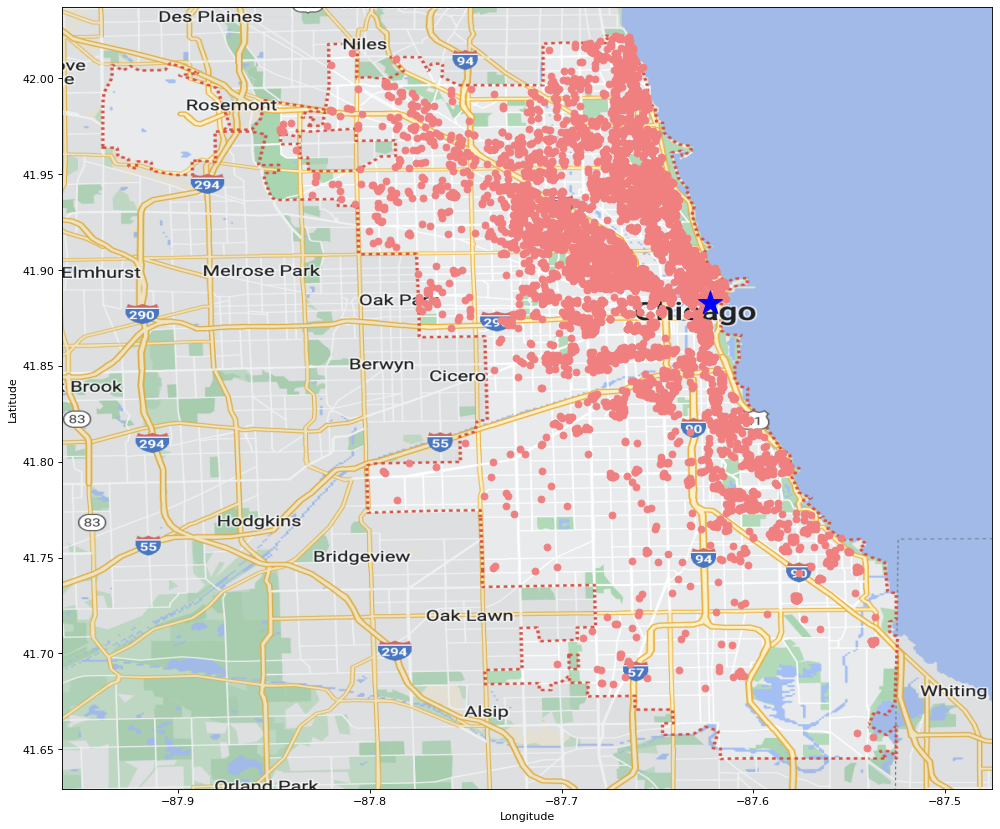

In [7]:
#| echo: false
# Coordinates of listings
coordinates_listing = listings_dropped.iloc[:,3:5].to_numpy()

#Millennium Park Coordinates
mp_coord = np.array([41.8826, -87.6226])

def listing_viz():
    img = plt.imread("Chicago_Map.png")
    fig, ax = plt.subplots(figsize=(10, 100),dpi=80)
    fig.set_size_inches(15, 13)
    ax.imshow(img,extent=[-87.960529, -87.475380, 41.629367, 42.036972])
    plt.scatter(y = coordinates_listing[:,0], x = coordinates_listing[:,1], marker='o', color='lightcoral', zorder = 1)
    plt.scatter(y = mp_coord[0],  x = mp_coord[1], marker='*', color = 'blue', s= 500, zorder = 2)
    plt.xlim(-87.960529, -87.475380)
    plt.ylim(41.629367, 42.036972)
    plt.xlabel("Longitude")
    plt.ylabel("Latitude")
listing_viz()

First, I binned all the listings in the dataset into respective neighborhoods by creating a column 'area'. Then, I used two visualization methods using the 'area' column. I first created the bar chart (Appendix A-1), but realized that although it shows the categorization and how many listings each neighborhood has, it does not show visually how they are distributed over the Chicago land. Therefore, I decided to make a scatterplot overlaid on the Chicago map to better visualize the geographical distribution.

It shows that the majority of the listings are located in the Central/ North Side areas of Chicago. And the same can be deduced by seeing the scatter plot. Listings are less populated as it becomes farther away from the city area and as it goes to the South areas.

#### Viz 2: Listings in City vs. Residential Areas Price (Outlier-adjusted) 

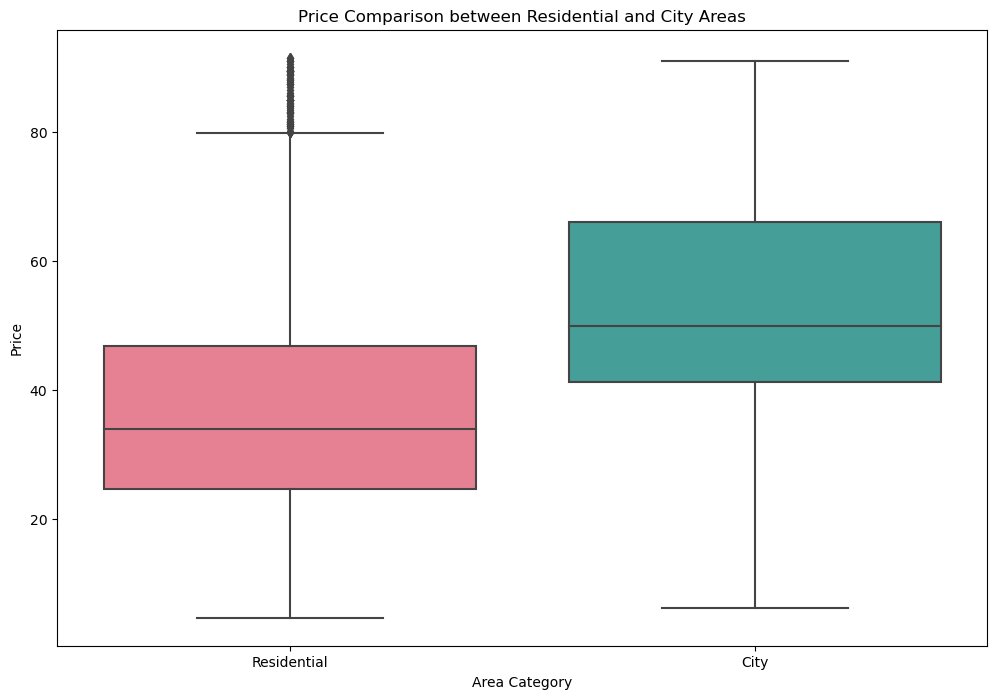

Percentage Difference in Price per Person for City compared to Overall Median: 42.11%
Percentage Difference in Price per Person for Residential compared to Overall Median: -8.55%


In [8]:
#| echo: false

# Calculate outliers using Tukey's method
def tukey_outliers(series):
    q1 = series.quantile(0.25)
    q3 = series.quantile(0.75)
    iqr = q3 - q1
    lower_bound = q1 - 1.5 * iqr
    upper_bound = q3 + 1.5 * iqr
    return (series < lower_bound) | (series > upper_bound)

listings_dropped['outliers'] = tukey_outliers(listings_dropped['price per person'])

wo_outliers = listings_dropped[listings_dropped['outliers'] == False]

# Create a new column 'area_category' to distinguish residential and city areas
listings_dropped['area_category'] = listings_dropped['area'].apply(lambda x: 'City' if x == 'Central' else 'Residential')
wo_outliers = listings_dropped[listings_dropped['outliers'] == False]

# Create a box plot for price comparison between residential and city areas
plt.figure(figsize=(12, 8))
sns.boxplot(x='area_category', y='price per person', data=wo_outliers, palette='husl')
plt.title('Price Comparison between Residential and City Areas')
plt.xlabel('Area Category')
plt.ylabel('Price')
plt.show()

# Calculate the median price per person for City and Residential areas
median_price_city = listings_dropped[listings_dropped['area_category'] == 'City']['price per person'].median()
median_price_residential = listings_dropped[listings_dropped['area_category'] == 'Residential']['price per person'].median()

# Calculate the median price for all listings
median_price_all = listings_dropped['price per person'].median()

# Calculate the percentage change in price per person for City and Residential areas compared to the median
percentage_change_city = ((median_price_city - median_price_all) / median_price_all) * 100
percentage_change_residential = ((median_price_residential - median_price_all) / median_price_all) * 100

print(f"Percentage Difference in Price per Person for City compared to Overall Median: {percentage_change_city:.2f}%")
print(f"Percentage Difference in Price per Person for Residential compared to Overall Median: {percentage_change_residential:.2f}%")

Here, I identified the outlying prices by using Tukey's fence method. Shown from the bar chart (Appendix A-2), the Central area has the most outlying prices, suggesting premium on locations near the city's core. This may be because of the proximity to tourist attractions, expensive house pricings, etc. Also, it is known that the North half of Chicago is wealthier than the South half, which may be one reason why north area listings' price to be more expensive.

After dropping all listings with outlying prices, I created a box and whisker plot. Looking at the visualization in Appendix A-3, plot shows the price distribution for listings grouped by each area. Here, it is apparent that the Central area has a higher median and 25th, 75th percentile, as well as a wider price range. The general north area has a higher median price and wider range than the general south area. To make the comparison more obvious, I binned all the residential areas into a category called 'Residential' by creating a new column called 'area_category'. Although this may be less accurate as it is the average of all the areas except the Central area (City), it clearly shows the trend that listings in the city have a higher overall price compared to the residential areas. The City having a wider IQR range shows that the central area has a more diverse range of prices, potentially with a mix of affordable and premium listings.

I also calculated the percentage difference in price per person between city/ residential area and the overall median price per person to quantify the trend. Here, we realize that city listings tend to be 42% more expensive compared to the overall median price and that the residential listings tend to be 9% cheaper than the overall median price.

#### Viz 3: Euclidean Distance

Pearson Correlation Coefficient for City: -0.2431514372110407
Pearson Correlation Coefficient for Residential: -0.13587967221351582


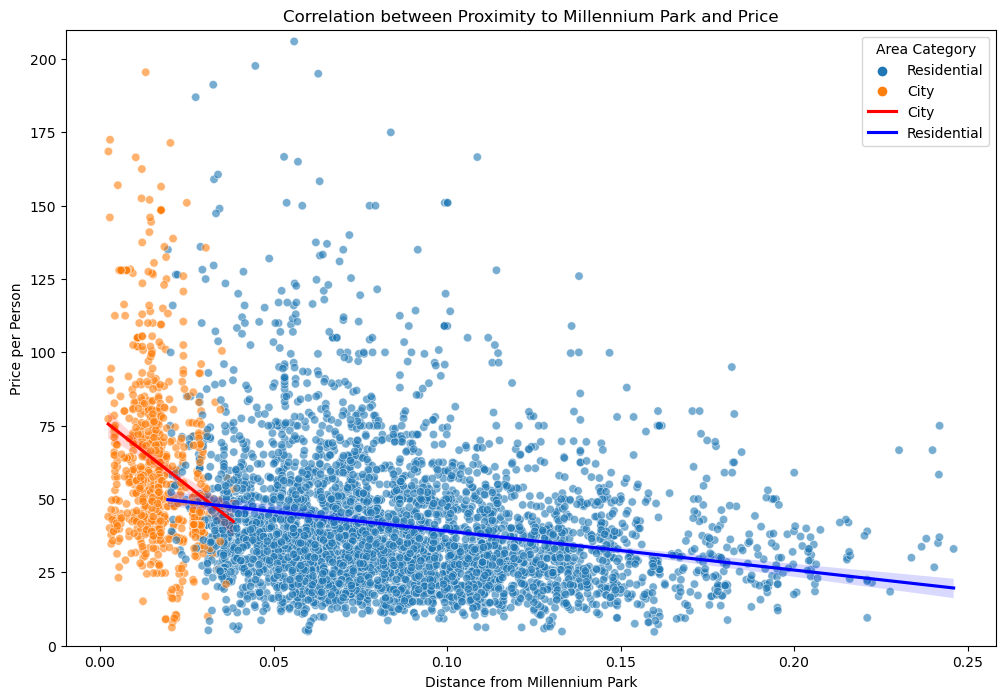

In [9]:
#| echo: false

distance_from_mp = np.sqrt(np.sum((mp_coord-coordinates_listing)**2,axis=1))

distance_from_mp[distance_from_mp==0]=9999
closest_coord_index = np.argmin(distance_from_mp)
closest_coord_index


closest_coord = coordinates_listing[closest_coord_index,:]
closest_listing = listings_dropped.iloc[closest_coord_index, :]
closest_listing


farthest_coord_index = np.argmax(distance_from_mp)
farthest_coord = coordinates_listing[farthest_coord_index, :]
farthest_listing = listings_dropped.iloc[farthest_coord_index, :]

coordinates_listing[168,:]

listing_coord = np.array((closest_coord, farthest_coord))

# add new column of the distance between listings and the Millennium Park
distance_from_mp = np.sqrt(np.sum((mp_coord - np.array(listings_dropped[['latitude', 'longitude']])) ** 2, axis=1))
listings_dropped['distance_from_mp'] = distance_from_mp

#scatterplot
plt.figure(figsize=(12, 8))
sns.scatterplot(x='distance_from_mp', y='price per person', hue='area_category', data=listings_dropped, alpha=0.6)

#Regression line for City
sns.regplot(x='distance_from_mp', y='price per person', data=listings_dropped[listings_dropped['area_category'] == 'City'], scatter=False, color='red', label='City')

#Regression line for Residential
sns.regplot(x='distance_from_mp', y='price per person', data=listings_dropped[listings_dropped['area_category'] == 'Residential'], scatter=False, color='blue', label='Residential')

plt.title('Correlation between Proximity to Millennium Park and Price')
plt.xlabel('Distance from Millennium Park')
plt.ylabel('Price per Person')
plt.legend(title='Area Category', loc='upper right')
plt.ylim([0,210])

#Pearson coeff for City
correlation_city = listings_dropped[listings_dropped['area_category'] == 'City']['distance_from_mp'].corr(listings_dropped[listings_dropped['area_category'] == 'City']['price per person'])
print(f"Pearson Correlation Coefficient for City: {correlation_city}")

#Pearson coeff for Residential
correlation_residential = listings_dropped[listings_dropped['area_category'] == 'Residential']['distance_from_mp'].corr(listings_dropped[listings_dropped['area_category'] == 'Residential']['price per person'])
print(f"Pearson Correlation Coefficient for Residential: {correlation_residential}")

plt.show()

In this scatterplot, I first calculated the euclidean distance of each of the listings from the Millennium Park. The x-axis is the distance from the Millennium Park, and the y-axis is the price per person for each listings. I also included a trendline using regplot to visualize the correlation between the two variables.

To dive deeper into the Pearson correlation coefficients, both of the area categories have a negative correlation, which means that as the distance from the Millennium Park increases, the price per person tends to decrease. We can gauge the strength of the correlation by seeing the absolute values of the correlation coefficient. City has a weak to moderate magnitude (-0.243), which we can conclude that it has a discernable downward trend. The residential area has a weak magnitude (-0.136). Therefore, we can conclude that though correlation exists, since they are not strong, distance to the city is a factor, but not the sole and most important factor that determines the price of the listing. There may be other factors that are incorporated in the process of deciding the price. This ultimately answers and concludes my EDA question.

### Analysis 2
*By Christine Kim*

I was interested in the disparities in amenity offerings between different Airbnb listings. Especially from the perspectives of the hosts, I wanted to solve the problem of what amenities they should offer depending on their target price to charge for the listing or to gain a higher revenue. Therefore, this section revolves around the question: Are there associations between Amenities and the Price of the listing?

I hoped that analyzing the data around this EDA question would be able to solve the hosts’ problems by offering insight into which amenities are the most/least common or associated with higher/lower prices. Ultimately, from the standpoint of hosts who want to be able to charge higher prices on their listings to gain more revenue, this analysis could form valuable insights into which amenities hosts should focus on or prioritize offering.

A major challenge that I anticipated and encountered was the data cleaning process for the amenities column in the listings dataset. In the original 'listings' dataset, each value of the 'amenities' column was a list of strings listing out every amenity that was offered at the airbnb property. I cleaned the dataset to make each amenity mentioned a categorical variable represented by the values 0 if not offered by the listing and 1 if offered by the listing. However, a problem that I faced was that doing this resulted in 2428 columns of amenity categorical variables. This was because variations in spelling or description of the same amenity led to the creation of multiple variables. For example, "body wash" or "body soap" or "shower gel" are three variations of the same amenity.

To overcome this challenge, I tried multiple methods such as renaming columns that contained the same word as that word (e.g. "Pantene shampoo" and "Dove shampoo" renamed as "shampoo"), but even this resulted in an exorbitant number of amenity categorical variables that were unable to be visually represented in a clear way. Finally, the method that I found worked best was to use keywords to categorize each amenity into a category. By this method, I was able to categorize most amenities, excluding those that were too obscure and were only offered by less than 1% of all the listings, into 21 distinct amenity categories, and correspondingly, create 21 amenity categorical variables columns in the dataset (See Appendix B-1).

Given the cleaned data, I attempted to analyze my question: Are there associations between Amenities and the Price of the listing?

I first looked at the variety of amenities offered at an accommodation against its listing price. By intuition, my hypothesis was that offering a greater variety of amenities might be associated with higher prices, since these listings would attract customers who are looking for better equipped airbnbs despite a higher price per night. I anticipated that it would be hard to see trends across over 5000 listings; thus, I decided to bin the listings into "High prices'' and "Low prices" categories, which represented listings that charged above the median price/night and listings that charged below the median price/night, respectively. Also, since there are 21 different amenity categories, I decided to focus less on the specific amenity categories and more on the number of amenity categories offered, for the simplicity and readability of my first visualization, as well as to capture the distinct trend associated with offering a larger variety of amenities.

From my analysis, I found that as the number of distinct amenity categories offered increased, so did the number of listings priced above the median relative to the number of listings priced below the median (Figure in Appendix B-2). More specifically, the visualization shows that a greater proportion of listings that offer 13 or more different amenity categories are associated with higher prices than with lower prices, with the greatest relative difference at 16 amenity categories. The result was somewhat surprising to me as the variety of amenity categories offered tended to be greater than what I expected. It seems that offering up to 12 different amenities categories is more prevalent in listings below the median price. 

This result prompted a question around specific amenity categories, and I wanted to distinguish which amenity categories are the ones that matter. Thus, furthering my analysis, I looked at the prevalence of each amenity category across listings in the dataset (Figure in Appendix B-3). I thought that this would help me discern those amenity categories offered across most listings regardless of price against the more selectively offered amenity categories. I found that environmental_amenities, safety_amenities, wifi_amenities, kitchen_amenities, and laundry_amenities were offered nearly ubiquitously across all listings in the dataset. The high prevalence of these amenities suggest that most airbnb hosts in Chicago already offer them, and this might suggest that these amenities are considered essential in airbnbs. On the other hand, there are other amenity categories with a lower proportion of listings that offer them and tend to be relatively less commonly offered in airbnbs in Chicago.

My analysis and visualizations thus far show that listings in Chicago that offer a greater variety of amenity categories are more likely to be associated with prices higher than the median price, but that there are also some essential amenities and some selective amenities. This motivated the question then, out of the less common amenity categories, which ones should the host prioritize offering to maximize their revenue increase?

Given my previous analysis, for my third and final visualization, I examined the average price increase relative to the mean price that is associated with offering a specific amenity category. I thought that showing the achievable average increase in price after offering an amenity category would add value to analyzing my EDA question of association of amenities to prices, as well as to solving the larger problem of what amenities hosts should offer to earn a higher revenue from their listing.

In [10]:
#| echo: false
## Visualization 3: Prevalence of each amenity category

overall_average_price = listings_nooutlier['price'].mean()

# Dictionary to store the price differential for each amenity
price_differential = {}

# Iterate over each amenity category to calculate the average price and price differential
for amenity_category in amenity_categories:
    has_amenity = listings_nooutlier[listings_nooutlier[amenity_category] == 1]['price'].mean()
    price_differential[amenity_category] = has_amenity - overall_average_price

sorted_differential = pd.Series(price_differential).sort_values(ascending=False)

fig, ax = plt.subplots(figsize=(12, 8))
sorted_differential.plot(kind='bar', color='lightcoral', ax=ax)
ax.set_title('Average Price Increase from offering an Amenity Category')
ax.set_xlabel('Amenity Category')
ax.set_ylabel('Average Price Increase ($)')
ax.axhline(0, color='black', linewidth=0.8)

# Annotate bars with the value of the price differential
for i, v in enumerate(sorted_differential):
    ax.text(i, v if v > 0 else 0, f"${v:.2f}", color='black', ha='center', va='bottom')

plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

NameError: name 'listings_nooutlier' is not defined

From the plot, we see an interesting trend that offering the more prevalent, "essential" amenity categories identified from my second plot is associated with the smallest average price increase relative to the mean price of almost 0. On the other hand, out of the less commonly offered amenities, views_amenities and family_amenities are associated with the largest average price increase, followed by exercise_amenities and storage amenities, at approximately ~$30 per night.

Interpreting my findings collectively, my analysis suggests that it would be beneficial for the hosts from a price standpoint to offer more amenity categories than less, if feasible. In terms of considering the amenity categories and their associations with price, adding more amenities categories in order of the highest price increases from plot 3 would maximize the correlation of their listings with charging higher prices per night. As hosts add their amenity category offerings, they also should keep in mind that while association with higher prices does increase as more variety of amenity categories are offered, the majority of listings that offer 13 or more distinct amenity categories are associated with prices above the median.

### Analysis 3
*By Zindeh Scere*

I was interested in learning about how the behavior and traits of the hosts influence the rating and experience of customers. This is useful information for hosts who want to receive the best possible scores from customers and/or are looking for ways to improve the customer's overall experience. This information can also be useful for customers who are searching through listings and are interested in finding reliable hosts. Therefore, this section focuses on the question: Are there associations between Host Attributes and Booking Satisfaction?

By glancing at the dataset, I initially thought that by examining the host's response times and rates, hosts with quick response times and high rates would likely have strong customer reviews because of the effort put in to communicate with customers. I wanted to see which rates and times got the most positive reviews from customers. I anticipated that because I was working with a combination of categorical and continuous variables, I might have some issues with data cleaning and wrangling. Preemptively, I created dummy variables to find correlations and search for ways to best visualize categorical variables. However, my first point of analysis ended up causing a challenge due to the limited number of insights it produced and the disparity in the amount of data points.

To begin, I converted host_response_rate to a float and divided it by 100 to make it into a decimal. Previously, the values were whole numbers that weren't numerically representative of the rates. Converting the values into a decimal made for easier analysis as they could better represent the fraction of time (rates) being analyzed. Next, I used groupby to create groups for host_response_time as it was a categorical variable that I wanted to evaluate with continuous variables. I first looked at the mean of each response rate for each value group within host_response_time. I then plotted the mean values using a bar graph.

Although the data was intuitive (those with quicker response times, had higher response rates), there were a couple of issues with the visualization. One, there wasn't much variability within the data. There was minimal difference between the mean rate for “within a few hours” (97.9%), and “within an hour” (99.32%). Second, while there was a significant difference between “a few days or more” (15.17%) and the rest of the data, when I looked at the distribution of the values for each category, there was a huge skew in the distribution of value counts. A few or more days seemed to have a significantly lower number of data points (152 values vs within an hour which had 6589).

###### Host response time vs host response rate

<Axes: xlabel='host_response_rate', ylabel='host_response_time'>

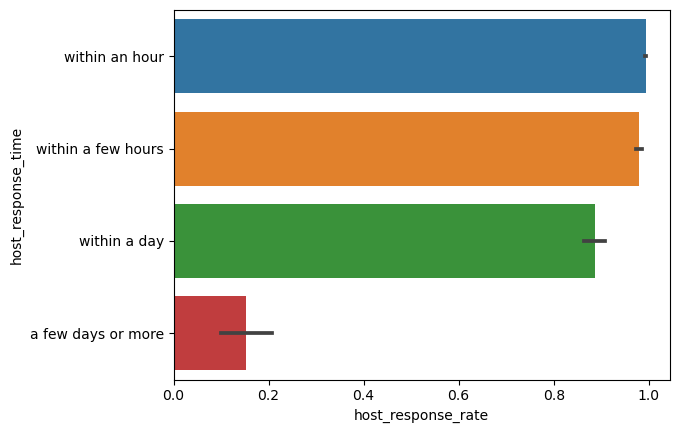

In [11]:
#| echo: false
listings.host_response_rate = listings.host_response_rate.astype(float)/100

sns.barplot(data = listings, x = 'host_response_rate', y = 'host_response_time')

##### Distribution of host response time variables

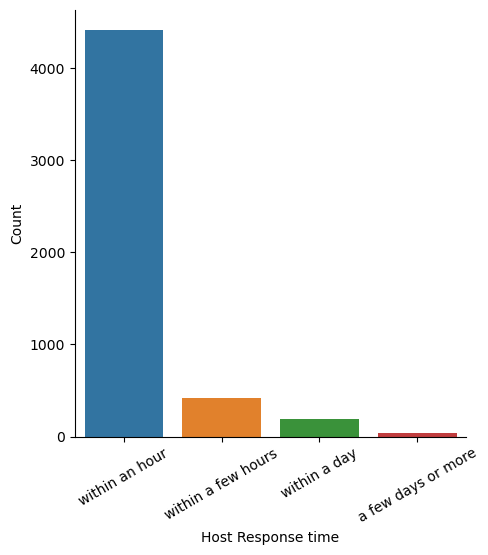

In [12]:
#| echo: false
a = sns.catplot(data = listings, x = 'host_response_time', kind = 'count',)
a.set_axis_labels("Host Response time", "Count")
a.set_xticklabels(rotation=30) 

I decided to attempt to plot the relationship between host response times and customer review ratings and found a similar outcome: little variability (this time even less) between mean overall customer ratings—making this a limited analysis to give back to the stakeholders. Again, because of the wide difference in the count between the categories, it's difficult to confidently tell stakeholders that it seems that response time might not influence customer response rating. The plot below makes it seem like there is little variability but when considering the variability within the count of each value (see plot above), the number of values for each group is too varied to confidently assess the potential insignificance of the relationship that is plotted below.

##### Host response time vs Customer review rating

Text(0.5, 1.0, 'Host Response Time vs Customer Review Rating')

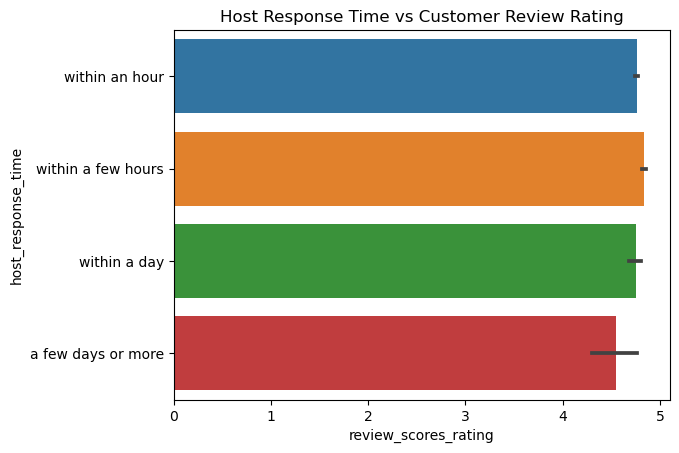

In [13]:
#| echo: false
sns.barplot(data = listings, x = 'review_scores_rating', y = 'host_response_time')
plt.title('Host Response Time vs Customer Review Rating')

Furthermore, using dummy variables, I was able to confirm my analysis by finding what seemed to be low positive and negative correlations between the variable host_response_rate and overall rating.
While these findings may indicate that quick responses could lead to faster response rates and that response time has a minimal relationship with overall rating, due to the distribution of the count of the values, I couldn't make a confident analysis and instead decided to find other ways to explore my question. So, I pivoted my approach to the question and instead looked at what host attributes outside of response rate and time were receiving the best feedback from customers.


##### Correlation outputs:

In [14]:
#| echo: false
dummy = pd.get_dummies(listings.host_response_time)
print('Correlation between Host Response Time and Rate:\n', dummy.corrwith(listings.host_response_rate), '\n', '\n'
      'Correlation between Host Response Time and Overall Rating:\n', 
      dummy.corrwith(listings.review_scores_rating))

Correlation between Host Response Time and Rate:
 a few days or more   -0.825115
within a day         -0.209463
within a few hours   -0.006145
within an hour        0.340784
dtype: float64 
 
Correlation between Host Response Time and Overall Rating:
 a few days or more   -0.050110
within a day         -0.007637
within a few hours    0.058116
within an hour       -0.030468
dtype: float64


Back in the dataset, I decided to search for more broad attributes and looked for relationships between them and the review categories. Host location stood out to me and when I printed out the unique variables, I was shocked to find a wide variety of locations for hosts. 
I found that there were 168 unique locations of hosts, many being far from Chicago. This made me curious as to how the location of a host might influence customer reviews. There were so many locations that I decided it might be best to focus on the 10 ten. Initially, within the top ten, there were values such as “United States” and “Illinois, United States.” Since none of the other locations in the top 10 were countries, I decided to drop "United States" because while there are 55 inputs, it may cause repetition or confusion. Additionally, all the other locations in the list were within the US so it might not make sense to have the United States show up again. I also got rid of inputs that were only "Illinois, United States" because, like the United States, many of the other locations were in Illinois and would potentially add repetition to the data as there was no way to distinguish between the two. I created a list of the top 10 cities (a requirement that excludes countries and states) that hosts listed. After that, I created a bar plot to show the relationship between a host's location and the mean overall rating received for hosts in that location. I learned that the host location with the highest mean overall rating is Tampa, FL. I also learned that Chicago’s mean overall rating was 6th. This finding may be because more hosts live in Chicago so they might have more variability due to their count, nevertheless, the mean ratings showed much diversity in both rating and location. This became my first visualization to present to stakeholders.

#### Visualization 1:

Text(0.5, 0, 'Mean Overall Rating')

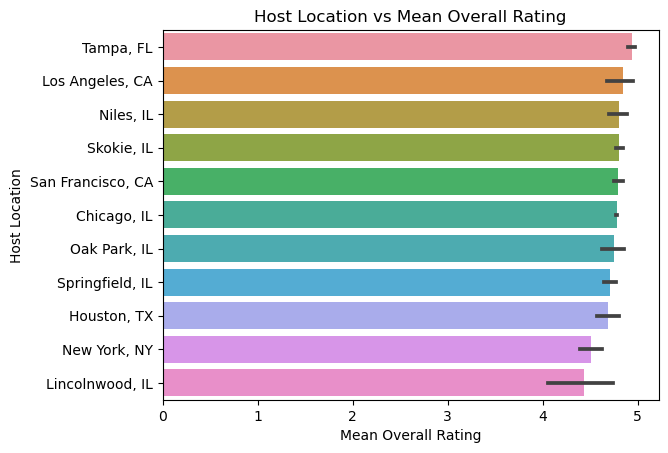

In [15]:
#| echo: false
top_5 = listings.host_location.value_counts()>=10
top_5_loc = listings.loc[listings.host_location.isin(top_5[top_5].index.to_list()),:]

list_loc = top_5_loc[['host_location', 'review_scores_rating']].groupby('host_location').mean()\
.drop(['United States', 'Illinois, United States']).sort_values(by = 'review_scores_rating', 
                                                                ascending= False).index.to_list()
sns.barplot(x = 'review_scores_rating', y = 'host_location', data=listings, order=list_loc)
plt.ylabel('Host Location')
plt.title('Host Location vs Mean Overall Rating')
plt.xlabel('Mean Overall Rating')

From the above plot, I found that cities outside of Chicago and in the case of the top 2, cities outside of Illinois, had a higher mean overall rating. This felt like a useful insight to present to hosts and customers: location doesn't necessarily negatively impact the host's ability to attain a high mean overall score. The high mean scores come from a variety of geographical locations. This may give confidence to hosts who might choose to move outside of Chicago and to customers who might be concerned about a host who is outside of Chicago being able to support them throughout their stay.

Next, I made several scatter plots focused on looking at how traits such as having a profile picture, having a verified identity, and being a super host influence the overall rating and host response rate relative to specific rating factors such as communication, accuracy, and check-in. I did this because I wanted to know what specific digital attribute hosts should focus on when working to push their listings on the website. I also felt this information would be helpful for customers to consider as they searched for reliable hosts that may be likely to ensure their satisfaction during the booking. Since these host attribute columns were booleans (true or false), I used a facet grid to compare the outcomes of each boolean. For example, for host_is_super host, I examined the relationship between overall rating and review accuracy, creating a graph for each boolean. The findings from these plots revealed several things. First, while there was a bit of noise in the graph, it did exemplify that being a super host did seem to matter. Hosts who were super hosts seem to display a closer linear relationship, indicating a possible strong correlation. Second, within my super host plots, their review factors seem to have a stronger relationship with their overall rating. Additionally, I also did a similar graph with host response rate and overall rating. This showed a similar outcome: super hosts were more likely to have a higher response rate which seems to have a strong positive relationship with their overall rating. These findings seem beneficial to stakeholders. Of the digital attributes available to analyze, being a super host seems to be the most impactful, and super hosts seem to consistently perform well with their review factors and response rates.

#### Visualization 2: 
##### Overall rating vs Accuracy (Superhosts vs not)

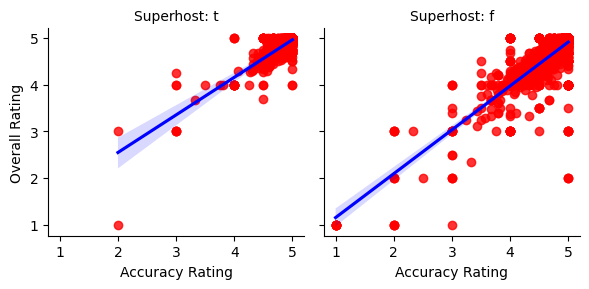

In [16]:
#| echo: false
a = sns.FacetGrid(listings, col = 'host_is_superhost', col_wrap = 2)
a.map_dataframe(sns.regplot, x = 'review_scores_accuracy', y = 'review_scores_rating', scatter_kws={"color": "red"}, line_kws={"color": "blue"})
a.set_titles(col_template= 'Superhost: {col_name}')

a.set_xlabels('Accuracy Rating')
a.set_ylabels('Overall Rating')

##### Overall rating vs Check in (Superhosts vs not)

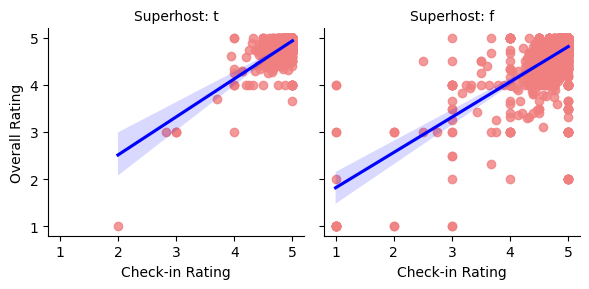

In [17]:
#| echo: false
c = sns.FacetGrid(listings, col = 'host_is_superhost', col_wrap = 2)
c.map_dataframe(sns.regplot, x = 'review_scores_checkin', y = 'review_scores_rating', scatter_kws={"color": "lightcoral"}, line_kws={"color": "blue"})
c.set_titles(col_template= 'Superhost: {col_name}')

c.set_xlabels('Check-in Rating')
c.set_ylabels('Overall Rating')

##### Overall rating vs Communication (Superhosts vs not)

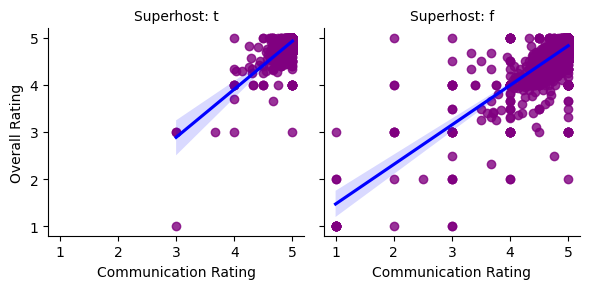

In [18]:
#| echo: false
b = sns.FacetGrid(listings, col = 'host_is_superhost', col_wrap = 2)
b.map_dataframe(sns.regplot, x = 'review_scores_communication', y = 'review_scores_rating', scatter_kws={"color": "purple"}, line_kws={"color": "blue"})
b.set_titles(col_template= 'Superhost: {col_name}')
b.set_xlabels('Communication Rating')
b.set_ylabels('Overall Rating')

##### Host response rate vs overall rating (Superhosts vs not)

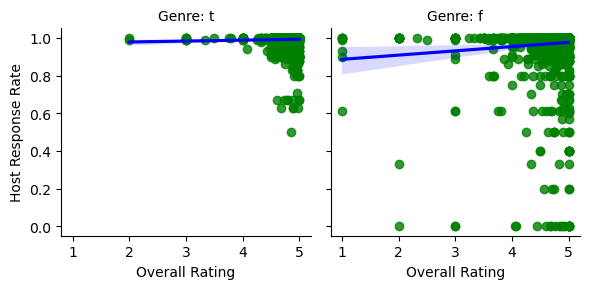

In [19]:
#| echo: false
f = sns.FacetGrid(listings, col = 'host_is_superhost', col_wrap = 2)
f.map_dataframe(sns.regplot, x = 'review_scores_accuracy', y = 'host_response_rate', scatter_kws={"color": "green"}, line_kws={"color": "blue"})
f.set_titles(col_template= 'Genre: {col_name}')

f.set_ylabels('Host Response Rate')
f.set_xlabels('Overall Rating')

Finally, looking at the seemingly strong relationship between overall rating and various customer review factors, I wanted to know whether a host's attribute or key factors for review had the strongest correlation with a customer's overall rating. This felt useful in understanding which potential element seemed to have the strongest correlation with a customer's overall satisfaction (represented by their overall rating) throughout their experience on Airbnb. Since I was looking at the correlation between multiple factors, I decided a heatmap might be the best way to visualize this. To do this, I first created a subset of variables that included both host attributes and various types of review ratings. I then created dummy variables for the categorical variables and mapped the correlation of all the variables. Through this visualization, I found that while being a super host did seem to have a strong correlation to a customer's overall rating, it was significantly outperformed by review factors such as communication, check-in, and accuracy. My analysis suggests that as hosts aim to ensure that customers have the best experience possible, their attributes may have less of an influence than other factors such as customers' perception of the cleanliness of a listing, the accuracy of the listing description, and the effectiveness of their communication.

#### Visualization 3:
##### Mapping correlation between host attributes and review factors

In [20]:
#| echo: false
vals = listings.loc[:,['host_identity_verified', 'host_response_rate', 'host_is_superhost', 'review_scores_rating', 'review_scores_accuracy',
       'review_scores_cleanliness', 'review_scores_checkin',
       'review_scores_communication', 'review_scores_location',
       'review_scores_value']]

Text(0.5, 1.0, 'Correlation Between Host Attributes and Rating Factors')

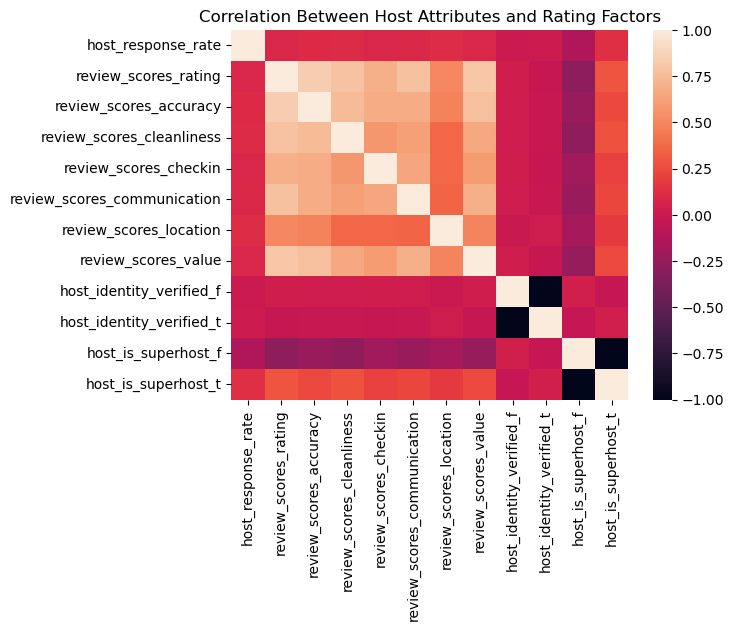

In [21]:
#| echo: false
sns.heatmap(pd.get_dummies(vals).corr())
plt.title('Correlation Between Host Attributes and Rating Factors')

### Analysis 4
*By Christine Lee*

My EDA question was *"How are seasonal trends related to pricing?".* To answer this, I knew that it would require an investigation into two main factors: Airbnb prices and temporal groupings. 

I decided to use average Airbnb prices as they would best represent all of the listings and because outliers were dropped during data preparations, the risk for skewed outcomes from were lowered. Furthermore, it allowed me to analyze as many listings as possible at once, which was important since this data included over ___ rows. 

Secondly, this question required temporal groupings to interpret seasonal trends. From this, I decided to focus on monthly prices, seasonal holidays, and special events in Chicago since they would best capture Chicago's local and tourist scenes. Specific reasons will be detailed below each visualization. 

One thing to be mindful of is that the open-source data from Inside Airbnb only provided datasets from 2022-12-20 to projections into 2023-12-19. As a result, I wasn't able to aggregate based on years nor make generalizations on a long-term basis. This also meant that the accuracy of the data was limited to when the data was last updated in 2023-09-12.

#### Visualization 1
##### Monthly Average Airbnb Prices Over the Last Year

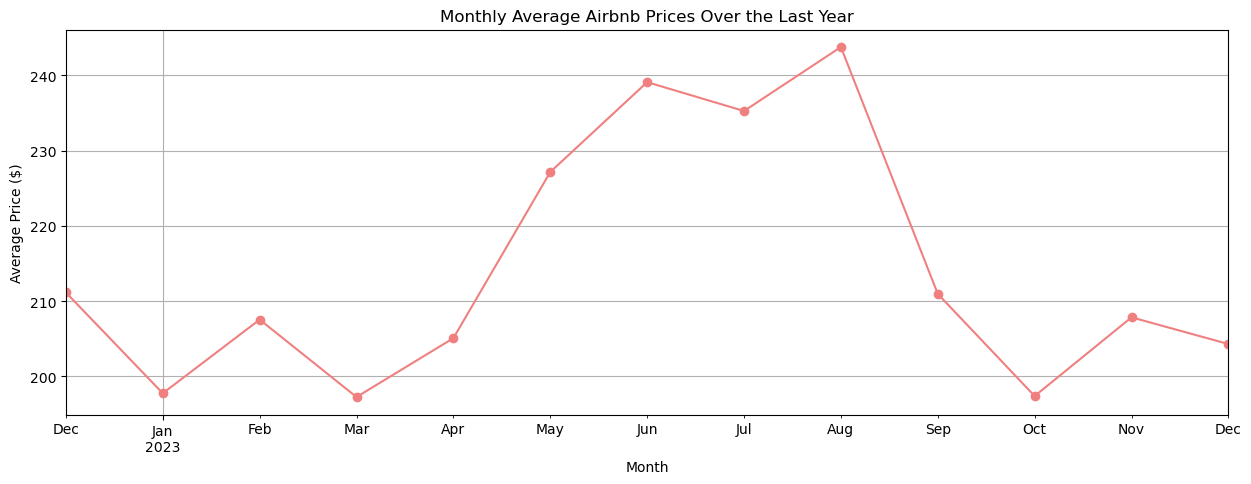

In [22]:
#| echo: false
# Convert the 'date' column to Timestamp
calendar_year['date'] = pd.to_datetime(calendar_year['date'])

## Visualization 1: Monthly Average Airbnb Prices Over the Last Year

# Filter data to only include the last year
one_year_ago = pd.Timestamp('2023-09-12') - pd.DateOffset(years=1)
last_year_data = calendar_year[calendar_year['date'] >= one_year_ago]

# Group by month and calculate the average price for each month
last_year_data['month'] = last_year_data['date'].dt.to_period('M')
monthly_prices = last_year_data.groupby('month')['price'].mean()

# Plotting the line graph
plt.figure(figsize=(15, 5))
monthly_prices.plot(kind='line', color='lightcoral', marker='o', linestyle='-')
plt.title('Monthly Average Airbnb Prices Over the Last Year')
plt.xlabel('Month')
plt.ylabel('Average Price ($)')
plt.grid(True)

plt.show()

To begin with an overall visualization of price fluctuations, I considered different scales including daily, weekly, monthly, and even yearly groups. Ultimately, I decided to use monthly averages since anything smaller (daily, weekly, day of the week) would have been too focused on the micro-flutuations, if any, in prices from each listing. This would've overwhelmed the analysis with too many points, as our data did provide daily information for each listing. On the contrary, anything larger (yearly) wasn't possible since our data was limited to the period mentioned earlier. Therefore, monthly was the best option. Also, I considered using line plots, bar plots, or box plots, but I chose a line plot to be the most successful visualization because it illustrated the individual points in the most straightforward manner. 

To analyze monthly average Airbnb prices over the last year, I had to prepare the data by converting the 'date' column to Timestamp to be able to filter it to only incude the last year. Again, since the data provided was limited to a certain timeframe, "the last year" meant that the data wouldn't span perfectly over the course of just 2022 or 2023, but from the provided period. With the filtered data, I grouped by month and calculated the average price for each month. These values were then plotted on a line graph using matplotlib libraries, with each point representing the average value. 

When undergoing this process, the most challenging aspect was deciding the temporal groupings that would best represent the data, but from there, the actual production of the visualization did not pose many challenges.

My analysis shows that prices tend to be the lowest in the Winter to Early Spring (Jan, Feb, Mar) with the lowest mean price in March (197.26) . In contrast prices tend to be the highest in the Summer (Jun, July, Aug) with the highest mean price in August (243.78) . The data suggests a seasonal trend in Airbnb prices resulting in a range of 45.52 between the min and max average prices. This can lead hosts to adjust prices or guests to visit Chicago differently based on the month. 

#### Visualization 2
##### Average Airbnb Prices during Seasonal Holidays

In [23]:
#| echo: false
# Convert 'date' column to datetime type
last_year_data['date'] = pd.to_datetime(last_year_data['date'])

# Extract month and day to identify holidays
last_year_data['month_day'] = last_year_data['date'].dt.strftime('%m-%d')

# Define holiday periods
holidays = {
    'Easter': ['04-04', '04-05', '04-06'],
    'Summer Vacation': ['06-01', '08-31'],
    'Thanksgiving': ['11-25', '11-26', '11-27'],
    'Christmas': ['12-24', '12-25', '12-26']

}

# Create a new column 'holiday' to label each day
last_year_data['holiday'] = 'None'
for holiday, dates in holidays.items():
    last_year_data.loc[last_year_data['month_day'].isin(dates), 'holiday'] = holiday

# Group by holiday and calculate the mean price
holiday_prices = last_year_data.groupby('holiday')['price'].mean().reset_index()

# Sort holidays by their mean prices
holiday_prices = holiday_prices.sort_values(by='price', ascending=False)

# Plot the data
plt.figure(figsize=(10, 6))
plt.bar(holiday_prices['holiday'], holiday_prices['price'], color=colors) #colors needs to be defined
plt.title('Average Airbnb Prices during Seasonal Holidays')
plt.xlabel('Holiday')
plt.ylabel('Mean Price ($)')
plt.xticks(rotation=45, ha='right')


# Set y-axis range to highlight variability
plt.ylim(min(holiday_prices['price']) - 10, max(holiday_prices['price']) + 10)

plt.show()

NameError: name 'colors' is not defined

<Figure size 1000x600 with 0 Axes>

Upon discussions with group members and our team mentor, I decided to investigate average Airbnb prices during seasonal holidays since we expect that more visitors visit Chicago during these periods which may affect prices. I chose seasonal holidays spaced out throughout the year and one for each season, and decided specific dates based on when they actually occured in 2022 and 2023, taking the one day preceding and succeeding each key holiday. The one exception was Summer Vacation which was an average of a generalized first and last day of summer (06-01, 08-31), which may have skewed the mean price slightly.

To create this visualization, I prepared the data using pandas and datetime to be able to extract the correct values, then I defined the holiday periods as 'Easter': ['04-04', '04-05', '04-06'], 'Summer Vacation': ['06-01', '08-31'],'Thanksgiving': ['11-25', '11-26', '11-27'],'Christmas': ['12-24', '12-25', '12-26']. These periods were grouped by holiday from which average values were calculated and sorted in order of highest to lowest. Finally, they were plotted on a bar plot using matplotlib libraries. 

Indeed, the data did show that there tends to be a difference in Airbnb prices during seasonal holidays. Although there wasn't much of a difference between no-holiday and Thanksgiving and Christmas, there was a notable difference between Summer Vacation and Easter prices, with prices being higher and lower, respectively. This finding corresponds to the previous visualization's findings, as Summer Vacation falls in the Summer seasons which had the maximum price, and Easter falls in the Winter to Early Spring seasons which had the minimum price. Although we cannot implicate causation of seasonal holidays and seasonal pricing, we can still consider it an influence in the Airbnb market. 

#### Visualization 3
##### Average Airbnb Prices during Special Events in Chicago

In [ ]:
#| echo: false

## Visualization 3: Average Airbnb Prices during Special Events in Chicago

# Define special events and their date ranges
events = {
    'Chicago Marathon': ['2023-10-08'],
    'Chicago Blues Festival': ['2023-06-08', '2023-06-09', '2023-06-10', '2023-06-11'],
    'Lollapalooza': ['2023-08-03', '2023-08-04', '2023-08-05', '2023-08-06'],
    'Chicago Jazz Festival': ['2023-08-31', '2023-09-01', '2023-09-02', '2023-09-03'],
    'Chicago Air and Water Show': ['2023-08-19', '2023-08-20'],
    'NASCAR Chicago Street Race': ['2023-7-1', '2023-7-2']
}

# Create a new column 'event' to label each day
last_year_data['event'] = 'None'
for event, dates in events.items():
    last_year_data.loc[last_year_data['date'].isin(dates), 'event'] = event

# Group by event and calculate the mean price
event_prices = last_year_data.groupby('event')['price'].mean().reset_index()

# Sort events by their mean prices
event_prices = event_prices.sort_values(by='price', ascending=False)

# Define different colors for each holiday
colors = ['lightcoral', 'lightblue', 'lightgreen', 'lightpink']

# Plot the data
plt.figure(figsize=(12, 6))
bars = plt.bar(event_prices['event'], event_prices['price'], color=colors)
plt.title('Average Airbnb Prices during Special Events in Chicago')
plt.xlabel('Special Event')
plt.ylabel('Mean Price ($)')
plt.xticks(rotation=45, ha='right')

# Set y-axis range to highlight variability
plt.ylim(min(event_prices['price']) - 10, max(event_prices['price']) + 10)

plt.show()

Finally, I looked at average Airbnb prices during special events in Chicago as visitors may be attracted and resort to Airbnbs for accomodations. I researched the top special events local to Chicago, and defined them based on the actual 2022 and 2023 dates they occured. 

Following a similar methodolgy to visualization I defined the special events periods as 'Chicago Marathon': ['2023-10-08'],'Chicago Blues Festival': ['2023-06-08', '2023-06-09', '2023-06-10', '2023-06-11'], 'Lollapalooza': ['2023-08-03', '2023-08-04', '2023-08-05', '2023-08-06'], 'Chicago Jazz Festival': ['2023-08-31', '2023-09-01', '2023-09-02', '2023-09-03'], 'Chicago Air and Water Show': ['2023-08-19', '2023-08-20'], and 'NASCAR Chicago Street Race': ['2023-7-1', '2023-7-2']. These periods were grouped by event from which average values were calculated and sorted in order of highest to lowest. Finally, they were plotted on a bar plot using matplotlib libraries.

This analysis showed also showed that there tends to be a difference in Airbnb prices during special events and no-special events, and between each special event as well. Moreover, Lollapalooza had the highest mean price at ~ 297 compared to the lowest mean price at when there is no special event at ~ 230. 

These finding corresponds to the visualization 1's findings, as many of these events fall in the Summer seasons which had the maximum price in the yearly plot. Although we cannot implicate causation of special events and seasonal pricing, we can still consider it an influence in the Airbnb market.

## Conclusions and Recommendations to stakeholder(s)

Two of our EDA questions, specifically, (1) What is the correlation between the proximity from the city and the price of the listing? and (4) how are seasonal trends related to pricing? attempt to answer a bigger question of how guests may be able to maximize their efficiency in terms of making budget conscious decisions when looking for Airbnbs in Chicago. Findings from both analyses may be combined to a more comprehensive recommendation to guests with regards to the price of Airbnbs, which would be especially useful for those guests who are looking to minimize their spending on accommodations during their travel.

The findings from the remaining two of our EDA questions, (2) Are there associations between amenities and the price of the listing? and (3) are there any associations between host attributes and booking satisfaction, may be viewed in conjunction to offer a more comprehensive set of recommendations to Airbnb hosts in Chicago. The findings attempt to help hosts enhance both their revenue and service measured by price and booking satisfaction, respectively. Hosts can use these recommendations to gain more insights into customer preferences throughout the booking process.

**Analysis 1:** Guest should be mindful that the price of the listings closer to Central Chicago tend to be 42% higher than the overall listings’ median price. The city has a widest range of price options, but budget-conscious guests may want to consider options in areas outside of the city as well as they mostly have cheap options. However, as evident from the box plots in Visualization 2, the median price of the listings in City is higher all 75th percentiles of the listings in the Residential area, which means it is possible for guests to find listings in the city that is as cheap as listings in Residential area.

This connects to answering my EDA, where there is no strong correlation between the price of listings and the proximity from the city, meaning that distance is not the sole factor of price determination. Therefore, guests should list their priorities and find the listings that is the most appropriate for their needs.

**Analysis 2:** New hosts should first ensure that essential amenities (environmental controls, safety, wifi, kitchen amenities) are provided. Given that the essential amenities are offered, hosts should consider offering the most value-adding amenities (views, family-friendly, exercise, and storage) at an increased price point (~$30). Specifically, if hosts are already looking to add more amenity categories to their listings, offering 13 or more distinct categories seem to be more strongly associated with charging higher prices than offering 12 or less.

The hosts should be aware about some limitations of the analysis, such as that the recommendations are based on broadly defined amenity categories and does not always recommend specifically which item within the amenity category they should offer (e.g. differentiate between lake view and beach view). However, the analysis can still be directly used by hosts in Chicago to obtain the expected revenue benefit of around $30 per night, especially if their listings have entire amenity categories that are not yet offered.

**Analysis 3:** Hosts should strive for positive reviews, responsiveness, and minimal cancellations (qualifications of a super host) to become a super host. This seems to be an impactful attribute in relation to a customer's booking satisfaction. However, to increase their likelihood of higher booking satisfaction and reviews, hosts should focus on clear communication, listing description accuracy, smooth check-ins, and cleanliness of their listings. This will allow them to be 72-85% more likely to receive strong booking satisfaction. Similarly, when searching for a listing, customers should review a host's communication, accuracy, check-in, and cleanliness rating as this seems to have a strong correlation to the overall booking satisfaction of their previous customers.

Customers and stakeholders should be aware that there are limitations to this analysis as greater investigation might be needed to explore what—if any—confounding might be playing a role in the correlations found in these findings. Additional research may also be needed to find causality as correlation only speaks to the statistical relationships found between the variables within this dataset. 

**Analysis 4:** Guests can save up to 45/day if they book for Winter to Early Spring (Jan, Feb, Mar) compared to Summer months (Jun, July, Aug). Therefore, they should try to book during Easter compared to Summer Vacation peak months. However, they should be mindful that many of Chicago’s special events do occur during the summer.

## References {-}

List and number all bibliographical references. When referenced in the text, enclose the citation number in square brackets, for example [1].

## Appendix {-}

### Appendix A
*By Seoyeon Yoon*

#### Appendix A-1

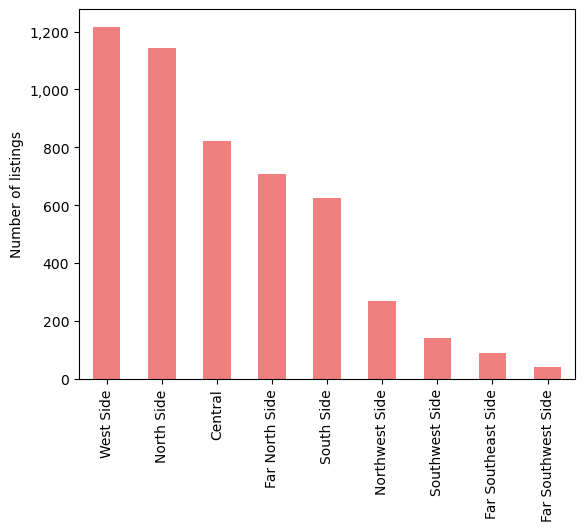

In [26]:
#| echo: false

#For Visualization 1
ax = listings_dropped['area'].value_counts()[:25].plot.bar(ylabel = 'Number of listings', color='lightcoral')
ax.yaxis.set_major_formatter('{x:,.0f}')

#### Appendix A-2

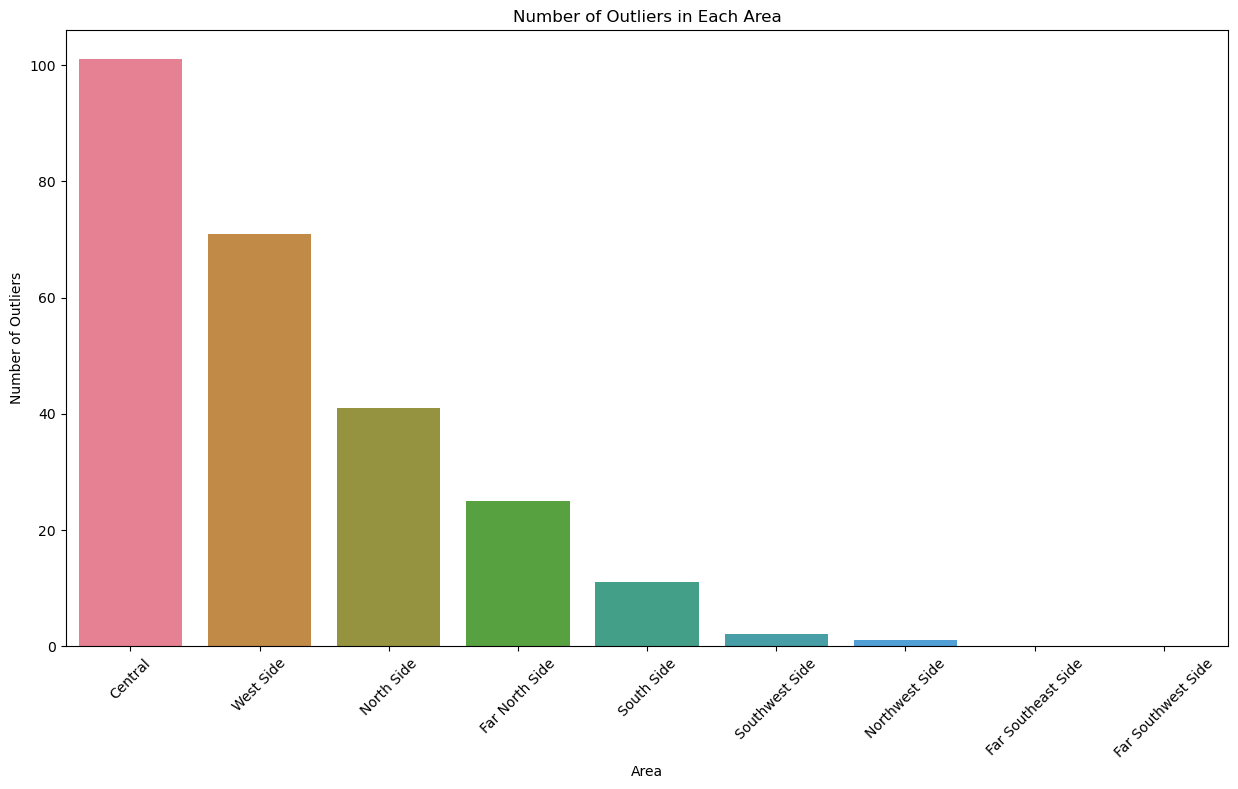

In [31]:
#| echo: false

# For Visualization 2

# Calculate outliers using Tukey's method
def tukey_outliers(series):
    q1 = series.quantile(0.25)
    q3 = series.quantile(0.75)
    iqr = q3 - q1
    lower_bound = q1 - 1.5 * iqr
    upper_bound = q3 + 1.5 * iqr
    return (series < lower_bound) | (series > upper_bound)

# Identify outliers and count them for each area
listings_dropped['outliers'] = tukey_outliers(listings_dropped['price per person'])

outliers_by_area = listings_dropped.groupby('area')['outliers'].sum().reset_index()
outliers_by_area = outliers_by_area.sort_values(by='outliers', ascending=False)

# Create a bar plot for the number of outliers in each area
plt.figure(figsize=(15, 8))
sns.barplot(x='area', y='outliers', data=outliers_by_area, palette='husl')
plt.title('Number of Outliers in Each Area')
plt.xlabel('Area')
plt.ylabel('Number of Outliers')
plt.xticks(rotation=45)
plt.show()

#### Appendix A-3

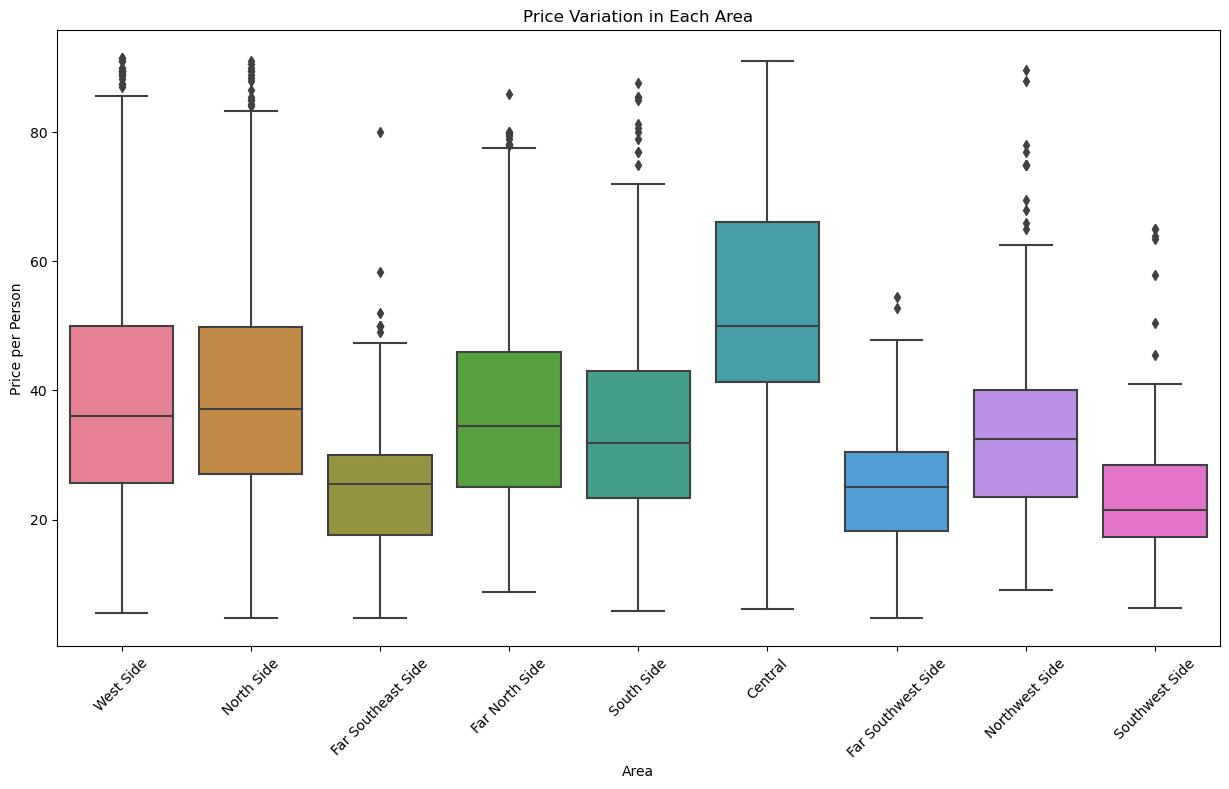

In [28]:
#| echo: false

# For Visualization 2
wo_outliers = listings_dropped[listings_dropped['outliers'] == False]

# Create a box plot for price in each area
plt.figure(figsize=(15, 8))
sns.boxplot(x='area', y='price per person', data=wo_outliers, palette='husl')
plt.title('Price Variation in Each Area')
plt.xlabel('Area')
plt.ylabel('Price per Person')
plt.xticks(rotation=45)
plt.show()

### Appendix B
*By Christine Kim*

#### Appendix B-1

The 21 amenity categories represent descriptions as follows:
   - 'wifi_amenities': wifi
   - 'bathroom_amenities': amenities including shampoo, body wash, conditioner, and hair dryer
   - 'kitchen_amenities': amenities including refrigerator, microwave, oven, stove, dishwasher, kettle, silverware, etc.
   - 'leisure_amenities': amenities including tv channels, games, books, sound systems, etc.
   - 'laundry_amenities': amenities including washers, dryers, irons, etc.
   - 'storage_amenities': amenities including storage space such as closets and dresssers
   - 'transporation_amenities': amenities including parking spaces, garage, ev chargers
   - 'environment_amenities': amenities including heaters, air conditioning, fans, etc.
   - 'safety_amenities': amenities including first aid kits, fire alarms, fire extinguishers, security cameras, etc.
   - 'exercise_amenities': amenities including gyms, treadmills, weights, yoga mats, etc.
   - 'views_amenities': amenities including different views and lake/beach access
   - 'outdoor_amenities': amenities including patios, yards, hammocks, sun loungers, etc.
   - 'luxury_amenities': amenities including hot tubs, pools, sauna, rooftops, etc.
   - 'family_amenities': amenities including children/baby-related equipment such as cribs, high chairs, changing tables, etc.
   - 'bedroom_amenities': amenities including blankets, pillows, bedlinens
   - 'pet_amenities': allowing pets
   - 'convenience_amenities': amenities including self check-ins, luggage services, and elevators
   - 'cleaning_amenities': amenities including cleaning products and trash
   - 'service_amenities': amenities including cleaning services, breakfast included, building staff access
   - 'smoking_amenities': allowing smoking
   - 'work_amenities': amenities including workspace/desks  


#### Appendix B-2

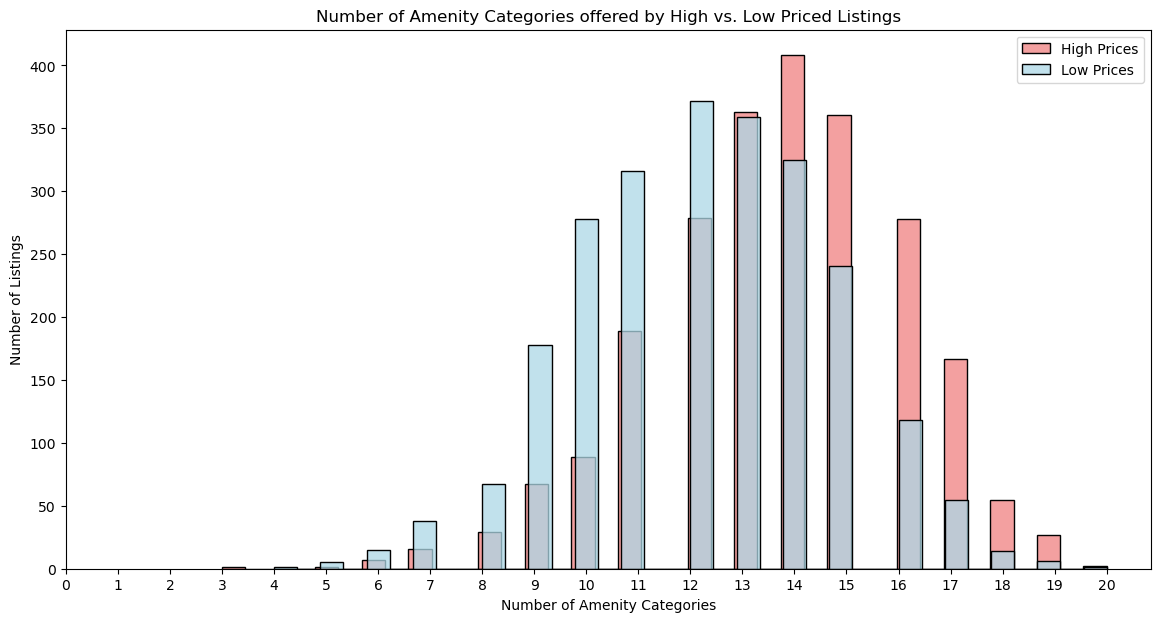

In [29]:
#| echo: false

listings = pd.read_csv('listings_filtered.csv')

# Removing price outliers
q1 = np.percentile(listings['price'],25)
q3 = np.percentile(listings['price'],75)
intQ_range = q3-q1

#Tukey's fences
Lower_fence = q1 - 1.5*intQ_range
Upper_fence = q3 + 1.5*intQ_range

Outlying_obs = listings[(listings.price<Lower_fence) | (listings.price>Upper_fence)]
Outlying_obs

listings_nooutlier = listings.drop(Outlying_obs.index)
listings_nooutlier.describe()
listings_nooutlier.columns

## Visualization 1: Prevalence of each amenity category

median_price_threshold = listings_nooutlier['price'].quantile(0.5)

listings_nooutlier['amenity_count'] = listings_nooutlier.iloc[:, listings_nooutlier.columns.get_loc('wifi_amenities'):listings_nooutlier.columns.get_loc('work_amenities') + 1].sum(axis=1)

# Bin into high and low prices
high_prices = listings_nooutlier[listings_nooutlier['price'] > median_price_threshold]['amenity_count']
low_prices = listings_nooutlier[listings_nooutlier['price'] <= median_price_threshold]['amenity_count']

plt.figure(figsize=(14, 7))
ax1 = sns.histplot(high_prices, color="lightcoral", label='High Prices', kde=False)
ax2 = sns.histplot(low_prices, color="lightblue", label='Low Prices', kde=False)
plt.xlabel('Number of Amenity Categories')
plt.ylabel('Number of Listings')
ax1.set_xticks(np.arange(0,21,1))
plt.title('Number of Amenity Categories offered by High vs. Low Priced Listings')
plt.legend()
plt.show()

#### Appendix B-3

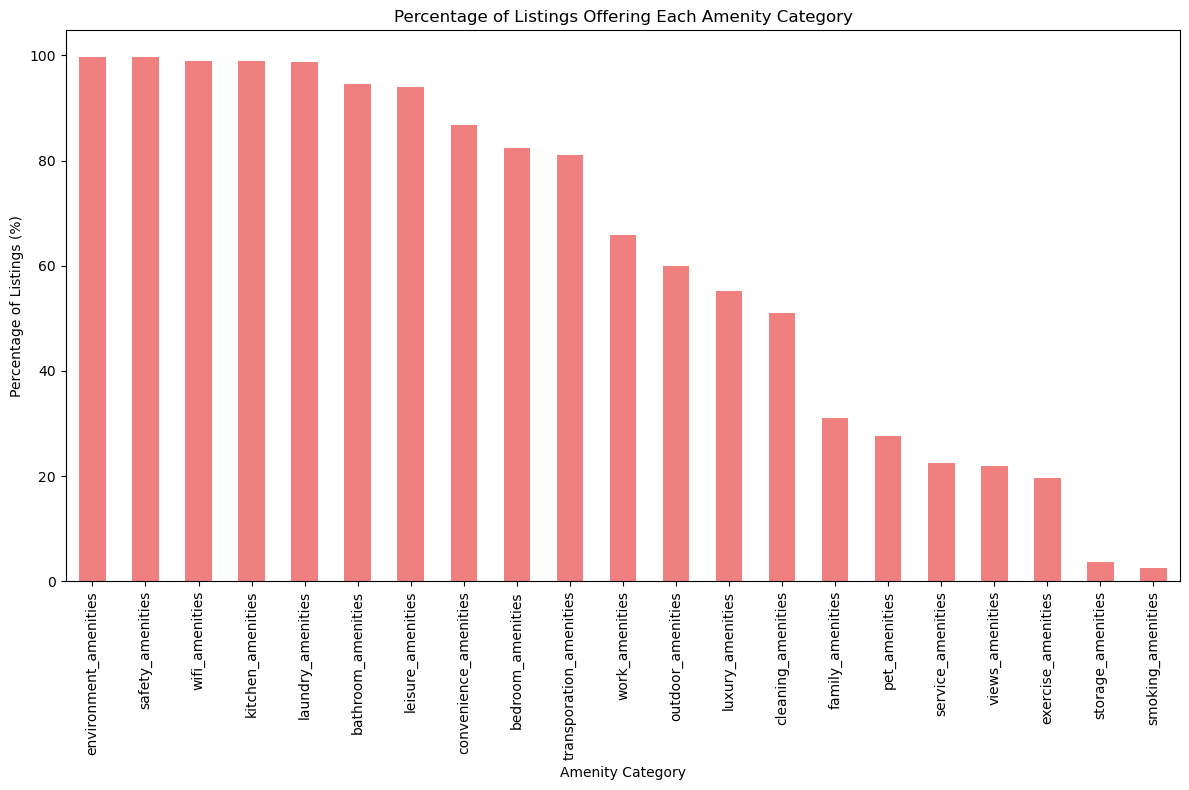

In [30]:
#| echo: false

## Visualization 2: Prevalence of each amenity category

amenities_count = listings_nooutlier.iloc[:, listings_nooutlier.columns.get_loc('wifi_amenities'):listings_nooutlier.columns.get_loc('work_amenities') + 1].sum().sort_values(ascending=False)

amenity_categories = list(amenities_count.index)

percentages = listings_nooutlier[amenity_categories].mean() * 100
sorted_percentages = percentages.sort_values(ascending=False)

plt.figure(figsize=(12, 8))
sorted_percentages.plot(kind='bar', color='lightcoral')
plt.title('Percentage of Listings Offering Each Amenity Category')
plt.xlabel('Amenity Category')
plt.ylabel('Percentage of Listings (%)')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

### Appendix C
zindeh

### Appendix D
christine